Dataset shape: (569, 31)
Columns: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
Target variable classes: ['malignant' 'benign']


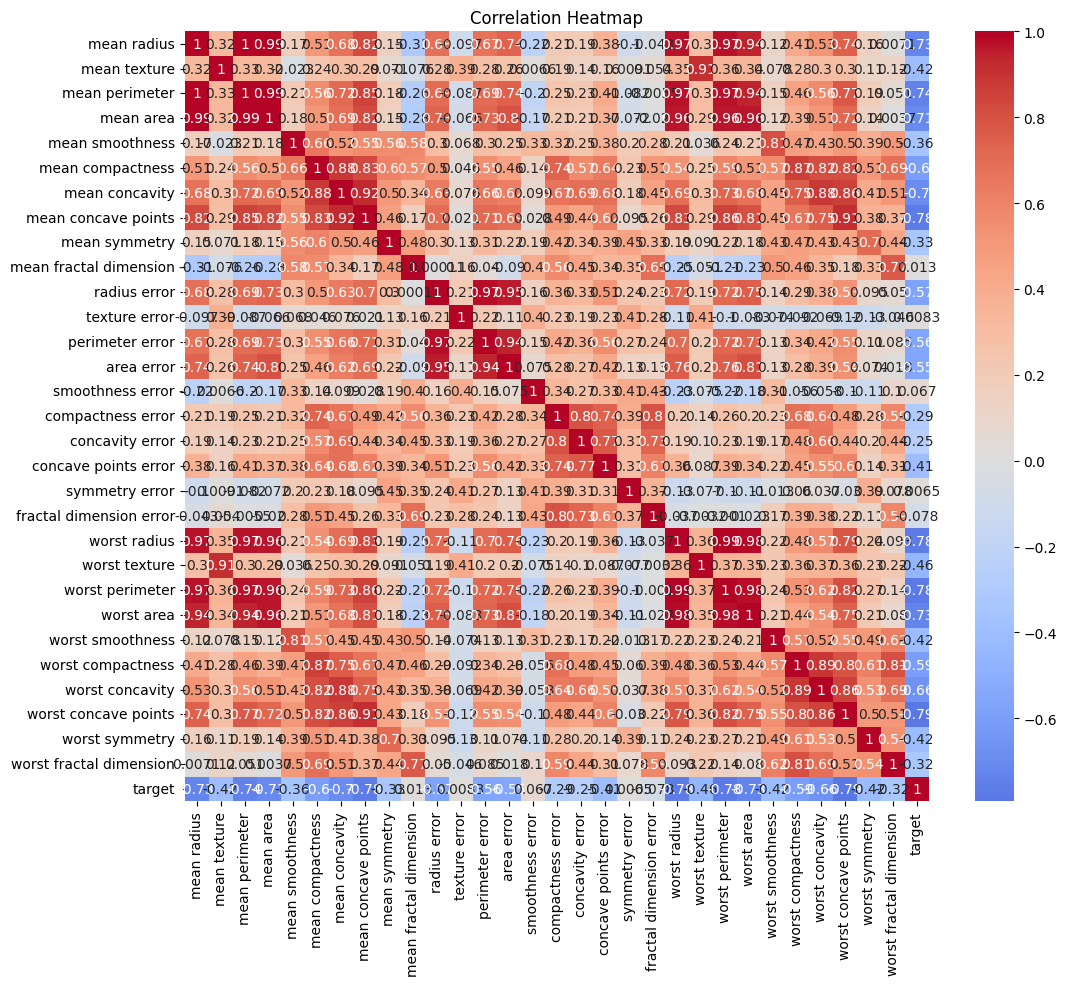

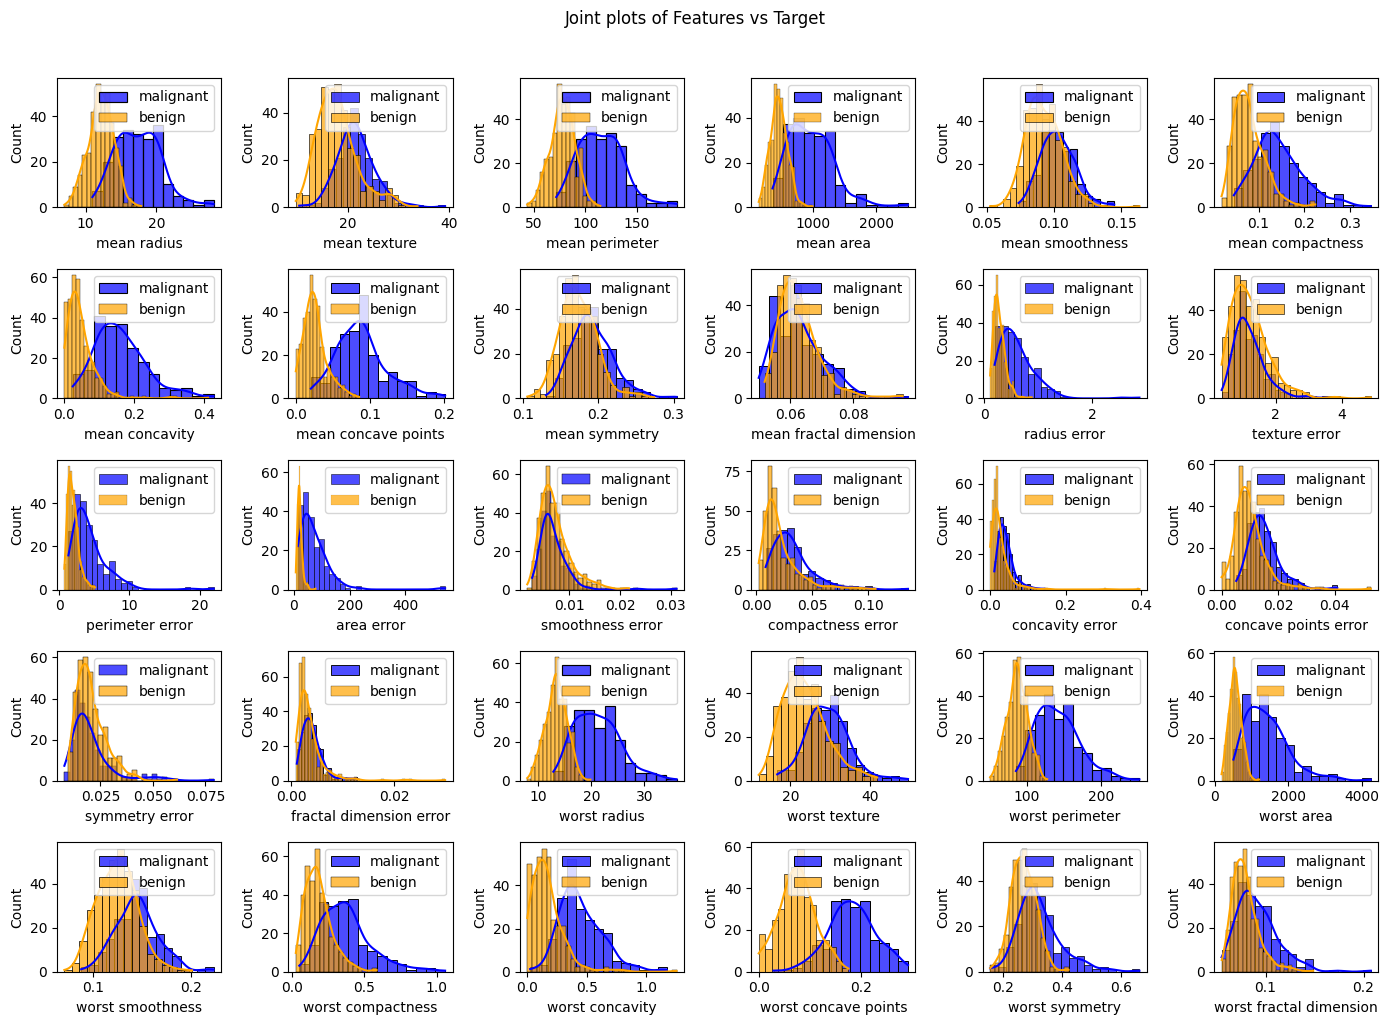

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.9626373626373625

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [10]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Convert data to DataFrame for easier analysis
df = pd.DataFrame(data=X, columns=cancer.feature_names)
df['target'] = y

# Display basic statistics and information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns}")
print(f"Target variable classes: {cancer.target_names}")

# Heatmap for visualizing correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



# Joint plots for individual feature vs target
plt.figure(figsize=(14, 10))
for i, feature in enumerate(cancer.feature_names):
    plt.subplot(5, 6, i + 1)
    sns.histplot(df[feature][df['target'] == 0], color='blue', label=cancer.target_names[0], kde=True, alpha=0.7)
    sns.histplot(df[feature][df['target'] == 1], color='orange', label=cancer.target_names[1], kde=True, alpha=0.7)
    plt.xlabel(feature)
    plt.legend()
plt.suptitle('Joint plots of Features vs Target', y=1.02)
plt.tight_layout()
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (accuracy): {grid_search.best_score_}")

# Predict and evaluate with best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
